# 3D и красивые графики#

Данные: https://titan.gml-team.ru:5003/sharing/ML2nqzorx  
Телеграм-канал курса: https://t.me/vgcourse

##### Всем привет!   
##### В этом задании мы рассмотрим основные артефакты 3D-фильмов, научимся их распознавать, а также построим много графиков.  
*Замечание. Каждый пункт задания не является конкурсным, т.е не нужно пытаться добиться идеальной работы метрики в каждом подпункте. **Вы можете остановиться** на том моменте, когда, по вашему мнению, предложенный метод показывает приемлемое качество (не нужно выбивать проценты в метриках качества).*

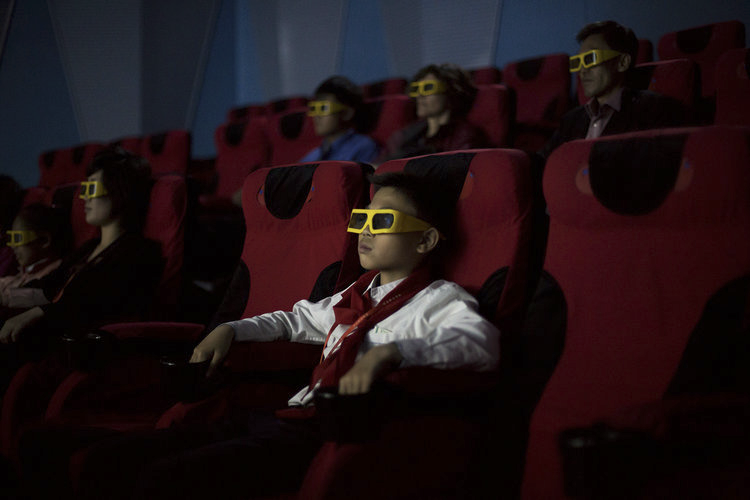
<div align="center">3D фильмы есть даже в Северной Корее (<a href="https://www.filippoventuri.photography/koreandream/y55h0jjwo1y8wvvfd3limseljisli4">Оригинал</a>) <br>
А 3D-фотографии с Северной Кореей можно посмотреть, например, <a href="https://www.huckmag.com/art-and-culture/photography-2/north-korea-portraits-matjaz-tancic/">тут</a></div>

### Прежде чем начать ###
Есть большой цикл статей про 3d на хабре
* [Почему от 3D болит голова / Часть 1: Недостатки оборудования](https://habr.com/ru/post/377493/)
* [Почему от 3D болит голова / Часть 2: Дискомфорт из-за качества видео](https://habr.com/post/377709/)
* [Почему от 3D болит голова / Часть 3: Перепутанные ракурсы](https://habr.com/post/378107/)
* [Почему от 3D болит голова / Часть 4: Параллакс](https://habr.com/post/378387/)
* [Почему от 3D болит голова / Часть 5: Геометрические искажения в стерео](https://habr.com/post/378721/)
* [Почему от 3D болит голова / Часть 6: Искажения цвета](https://habr.com/post/379115/)
* [Почему от 3D болит голова / Часть 7: Сдвиг во времени между ракурсами](https://habr.com/post/379671/)
* [Почему от 3D болит голова / Часть 8: Расфокус и будущее 3D](https://habr.com/ru/post/472782/)  

Также есть презентация по 3D из курса

В основном задание ниже посвящено статьям 4-6, но их читать для понимания не обязательно

Загрузим некоторые библиотеки, необходимые для работы шаблона. В этом задании разрешается использовать **любые** библиотеки

In [ ]:
import os
import numpy as np

import json
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
%matplotlib inline


def load_json_from_file(path):
    with open(path, 'r') as f:
        return json.load(f)

def dump_json_to_file(data, path, **kwargs):
    with open(path, 'w') as f:
        json.dump(data, f, **kwargs)

Загрузим информацию о выборке. Каждая запись хранит ссылку на левый и правый кадры, название фильма и тип искажения, который был обнаружен на кадре.

In [ ]:
data = load_json_from_file('stereo_dataset.json')
data[0]

# 1. Разминка (3 балла)#

Наиболее важной характеристикой стереокадра является оптический поток, построенный между кадрами (вы уже знакомились с ним на лекции про MotionEstimation)  
Существует много открытых реализаций оптического потока, для начала давайте найдём вашу любимую функцию вычисления оптического потока и вставим в функцию ниже  
*Скорее всего, вам понравятся функции вычисления optical flow из opencv и opencv-contrib*

In [ ]:
import cv2

def calculate_optical_flow(frame_from, frame_to):
    # На входе: два изображения
    # На выходе: матрица flow размера HxWx2, где flow[y, x] = (dx, dy) - сдвиг (именно (dx, dy)!)
    flow = #Ваша любимая функция
    return flow

Пример вызова функции:

In [ ]:
frame_idx = 715
left_frame = cv2.cvtColor(cv2.imread(data[frame_idx]['left']), cv2.COLOR_BGR2RGB)
right_frame = cv2.cvtColor(cv2.imread(data[frame_idx]['right']), cv2.COLOR_BGR2RGB)
flow = calculate_optical_flow(left_frame, right_frame)

In [ ]:
def visualize_frames_with_of(left_frame, right_frame, flow):
    rows = 2
    columns = 2

    fig = plt.figure(figsize=(16, 9))

    ax = fig.add_subplot(rows, columns, 1)
    ax.set_title("Left Frame")
    plt.imshow(left_frame)

    ax = fig.add_subplot(rows, columns, 2)
    ax.set_title("Right Frame")
    plt.imshow(right_frame)

    ax = fig.add_subplot(rows, columns, 3)
    ax.set_title("Optical Flow: X")
    plt.imshow(flow[:, :, 0])
    plt.colorbar()

    ax = fig.add_subplot(rows, columns, 4)
    ax.set_title("Optical Flow: Y")
    plt.imshow(flow[:, :, 1])
    plt.colorbar()

In [ ]:
visualize_frames_with_of(left_frame, right_frame, flow)

Также, возможно, полезна такая визуализация кадров:

In [ ]:
def visualize_frames_gif(left_frame, right_frame):
    output_file='tmp_frame.gif'
    import imageio
    #from IPython.display import HTML
    from IPython.display import Image as ImageDisplay
    duration = 1
    imageio.mimsave(output_file, [left_frame, right_frame], duration=duration)

    with open(output_file,'rb') as f:
        display(ImageDisplay(data=f.read(), format='png'))

In [ ]:
visualize_frames_gif(left_frame, right_frame)

In [ ]:
frame_idx = 416
left_frame = cv2.cvtColor(cv2.imread(data[frame_idx]['left']), cv2.COLOR_BGR2RGB)
right_frame = cv2.cvtColor(cv2.imread(data[frame_idx]['right']), cv2.COLOR_BGR2RGB)
visualize_frames_gif(left_frame, right_frame)

Это, кстати, [тот самый большой телефон](https://www.reddit.com/r/movies/comments/3hkwf8/alfred_hitchcock_with_the_giant_mockup_of_a/) для эффекта 3D

## Максимально усреднённый кадр ##

В качестве разминки давайте посмотрим на максимально усреднённый стереокадр. 
Как вы могли понять из лекции, кажущаяся глубина объекта в сцене зависит от горизонтального параллакса объекта:
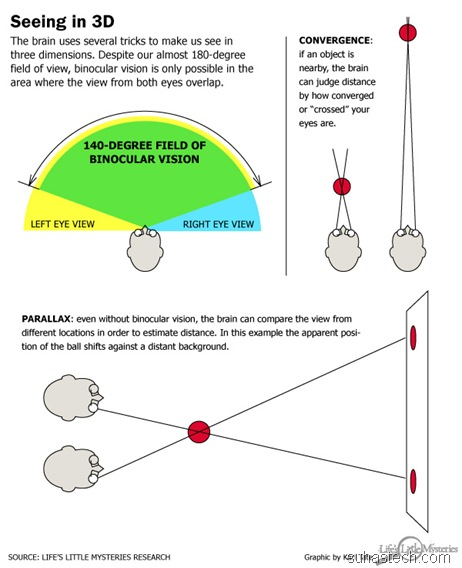
[оригинал](https://suhastech.com/how-3d-stereoscopic-display-glasses-works/)
* Объект не сдвигается горизонтально - видим объект в плоскости экрана
* Объект на левом кадре расположен левее, чем на правом - видим объект дальше экрана
* Объект на левом кадре расположен правее, чем на правом - видим объект ближе экрана  

Дальше будем связывать понятия "глубина" и "горизонтальный сдвиг объекта между кадрами".  
Предлагается построить два графика:
1. Карта усреднённой глубины по нескольким кадрам
2. Гистограмма распределения глубины объектов на кадрах

### Как располагаются объекты в сцене### 

#### Средний кадр####

Используя свою любимую функцию вычисления оптического потока, найдём горизонтальный сдвиг пикселей в каждой сцене:

*Возможно, вы используете такую функцию оптического потока, которая работает долго. Попробуйте сначала подсчитать график на небольшом числе примеров (<50 кадров), а потом поставить все графики на ночь*

In [ ]:
result = np.zeros((540, 960)) # Инициализация карты
for idx, node in tqdm_notebook(enumerate(data)):
    left_frame = cv2.imread(node['left'])
    right_frame = cv2.imread(node['right'])
    a = calculate_optical_flow(left_frame, right_frame)
    result += # Добавляем значения горизонтального сдвига в каждой точке
result = # Нормируем на количество кадров

Что мы видим:

In [ ]:
# Постройте график средней глубины. Пожалуйста, добавьте цветовую легенду и подпишите график

*Где на кадре располагаются в среднем самые глубокие/неглубокие объекты?*

**Я вижу, что ...**

#### Гистограмма глубины####

Теперь посмотрим на гистограмму распределения:

In [ ]:
result = # Инициализация
for idx, node in tqdm_notebook(enumerate(data)):
    left_frame = cv2.imread(node['left'])
    right_frame = cv2.imread(node['right'])
    a = calculate_optical_flow(left_frame, right_frame)
    hist = # Подсчитать гистограмму распределений горизонтального параллакса
    result += # Прибавить её к сохранённым значениям.
result = # Нормировать значение на количество кадров

Теперь воспользуйтесь одной из функций для визуализации гистограммы. Однако, давайте сделаем графики "правильными":
1. Подпишем оси
2. Добавим легенду
3. Сделаем так, чтобы на графиках была обозначена плоскость экрана (где $dx = 0$). Это можно сделать красной вертикальной линией, например
4. Добавить стрелочку "объект расположен ближе/дальше" в зависимости от x

In [ ]:
# Код для красивого графика

*Чаще объекты расположены дальше или ближе плоскости экрана?*

**Я вижу, что ...**

### Дополнительный квест: ###
    * Постройте аналогичные графики для нескольких (>=2) фильмов и сравните их между собой (1 балл)

# 2. Доверие (2 балла) #

Давайте ещё раз внимательно посмотрим на оптический поток:

In [ ]:
left_frame = cv2.cvtColor(cv2.imread(data[frame_idx]['left']), cv2.COLOR_BGR2RGB)
right_frame = cv2.cvtColor(cv2.imread(data[frame_idx]['right']), cv2.COLOR_BGR2RGB)
flow = calculate_optical_flow(left_frame, right_frame)

In [ ]:
visualize_frames_with_of(left_frame, right_frame, flow)

Что не так?

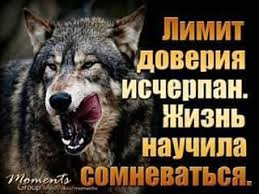

* Есть области, для которых не существует сопоставления на другом кадре, так называемые "области открытия/закрытия"  
* Есть проблема, что некоторые пиксели сложнее сопоставить, что происходит, например, на однородных областях. Нужно понимать степень "уверенности" алгоритма

Давайте далее учитывать степень уверенности алгоритма в ответе, подсчитывая некоторое "доверие" в каждой точке.  

Одним из самых простых способов построения карты доверия является проверка на то, что если значение оптического потока пикселя $A$ на левом кадре указывает на пиксель $B$ на правом кадре, то значение оптического потока в пикселе $B$ указывает на $A$. Формально:
$$ p + OF_L(p) + OF_R(p + OF_L(p)) = p $$
где $p= (x, y)$ - некоторый пиксель  
На практике, строгое равенство не получится, поэтому можно либо обрезать по некоторому порогу, создав бинарное доверие "хороший вектор/плохой вектор", либо использовать величину, обратно пропорциональную значению ошибки (1 - абсолютно уверены в ответе, 0 - абсолютно неуверены)

Давайте напишем функцию для вычисления доверия к значению оптического потока на карте:

In [ ]:
def optical_flow_consistency_check(of, other_of):
    # На входе: оптические потоки для левого и правого кадра (или наоборот)
    # На выходе: карта доверия к области
    h, w = of.shape[0], of.shape[1]
    confidence = np.zeros(of.shape[0:2]) # Ну или что-то своё
    return confidence

In [ ]:
left_frame = cv2.cvtColor(cv2.imread(data[frame_idx]['left']), cv2.COLOR_BGR2RGB)
right_frame = cv2.cvtColor(cv2.imread(data[frame_idx]['right']), cv2.COLOR_BGR2RGB)
flow = calculate_optical_flow(left_frame, right_frame)
other_flow = calculate_optical_flow(right_frame, left_frame)

In [ ]:
confidence = optical_flow_consistency_check(flow, other_flow)

In [ ]:
plt.figure(figsize=(16, 9))
plt.imshow(confidence)
plt.colorbar()
plt.title('Confidence for OF')

### Дополнительные квесты: ###
    * Реализуйте и сравните визуально ещё один вид доверия (1 балл)
    * Придумайте, как можно сравнивать варианты построения доверия, проведите анализ для 2 методов выше (2+ балла)

 # Вертикальный сдвиг кадра (2 балла) #

Теперь мы готовы искать артефакты на кадрах. Начнём с самого простого и популярного артефакта - вертикальный сдвиг кадра

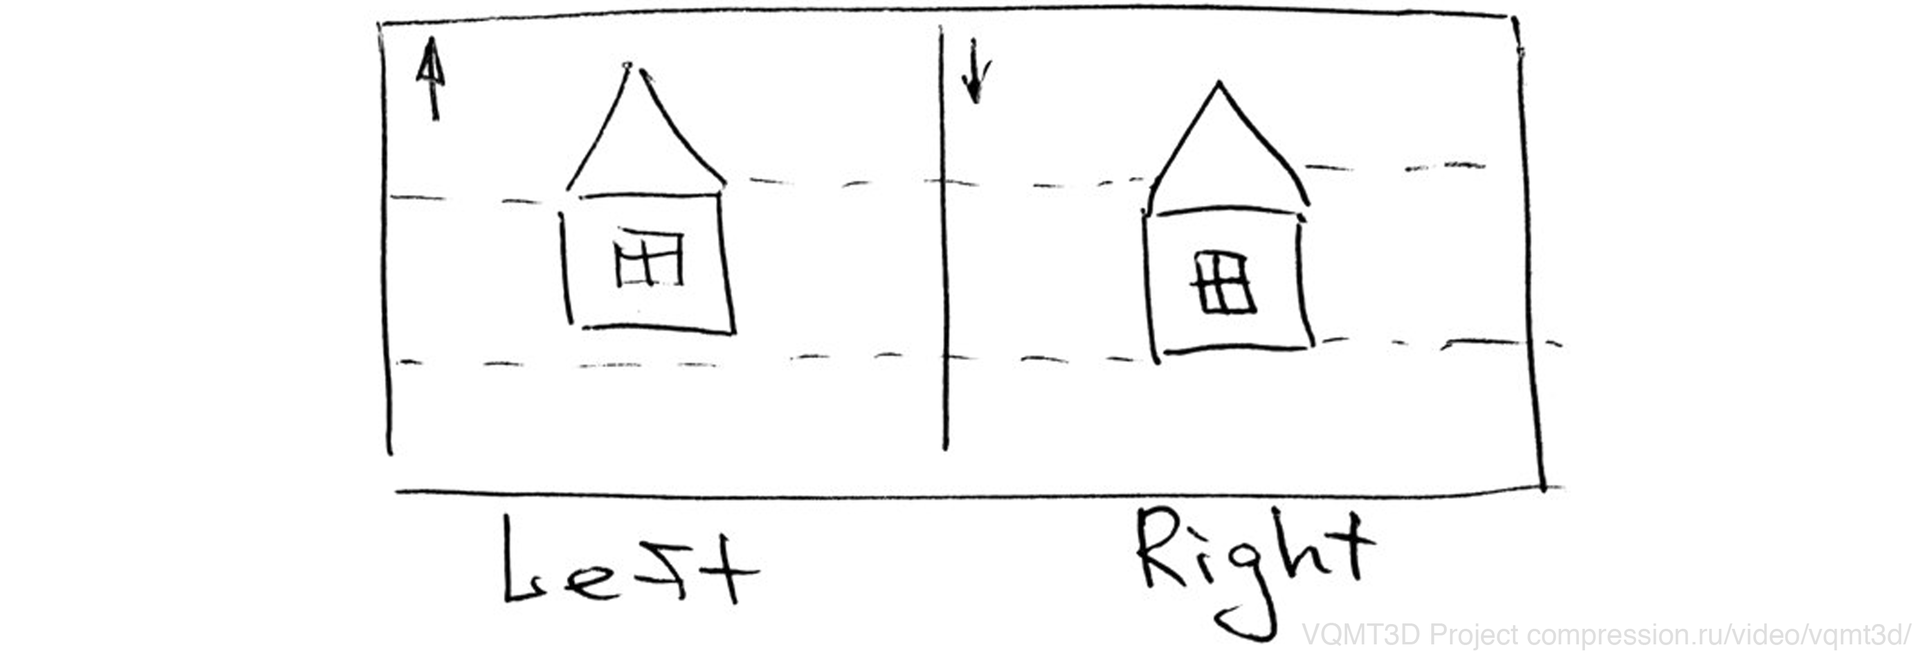

Давайте напишем простую метрику, которая бы позволяла детектировать простейшие вертикальные движения в камере (пока не нужно придумывать что-то сложнее, чем 5 строк кода):  
*Замечание Желательно, чтобы метрика была интерпретируемой (т.е посмотрите на размерность метрики - пиксели, проценты, сантиметры и т.п)*

In [ ]:
class Distortion3DEstimator():
    def __init__(self):
        pass
    
    def __call__(self, left_frame, right_frame, flow, confidence):
        pass

In [ ]:
class VerticalShiftEstimator(Distortion3DEstimator):
    def __init__(self):
        pass
    
    def __call__(self, left_frame, right_frame, flow, confidence):
        return {'value_vertical_shift': #Код для метрики}

Теперь давайте посмотрим на то, как он работает. Небольшой спойлер: разметка **не самая точная**, и она вполне может показывать не идеальное качество (тем более, есть похожие артефакты - поворот между ракурсами и несоответствие по масштабу, речь о которых пойдёт далее).

In [ ]:
def test_estimators(estimators, data, limit=None):
    values = []
    if limit is None:
        limit = len(data)
    for idx, node in tqdm_notebook(enumerate(data[0:limit])):
        left_frame = cv2.cvtColor(cv2.imread(node['left']), cv2.COLOR_BGR2RGB)
        right_frame = cv2.cvtColor(cv2.imread(node['right']), cv2.COLOR_BGR2RGB)
        flow = calculate_optical_flow(left_frame, right_frame)
        other_flow = calculate_optical_flow(right_frame, left_frame)
        confidence = optical_flow_consistency_check(flow, other_flow)
        result_frame = {
            'gt_shift_distortion': node['artifact'] == 'shift distortion',
            'gt_scale_distortion': node['artifact'] == 'scale distortion',
            'gt_rotate_distortion': node['artifact'] == 'rotate distortion',
            'gt_color_distortion': node['artifact'] == 'color distortion',
            'idx': idx,
        }
        for est in estimators:
            result_frame.update(est(left_frame, right_frame, flow, confidence))
        values.append(result_frame)
    return values

In [ ]:
vse = VerticalShiftEstimator()

vse_values = test_estimators([vse], data, 50) # убираем 50 для полного прогона

Оцените качество алгоритма на выборке:

In [ ]:
# Подсчёт какого-то числа по какой-нибудь метрике

Давайте также построим график нашей метрики. Например, вот такой: 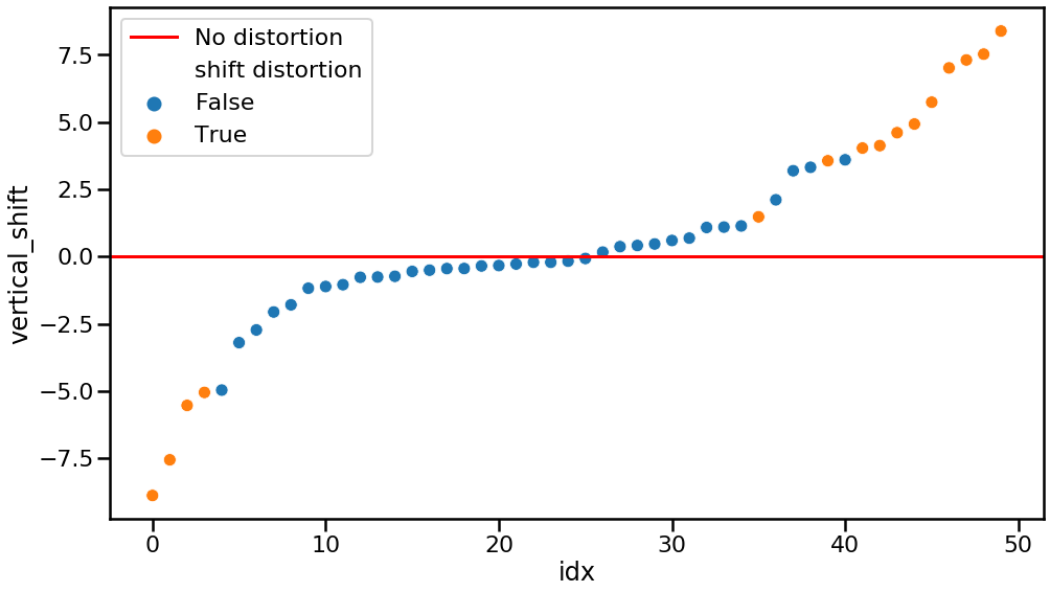

In [ ]:
# Код для графика

### Дополнительные квесты: ###
    * Напишите историю того, что вы сделали: какие идеи заработали, какие-нет (1 балл)

 ## Часть 2. Более сложные геометрические искажения (5 баллов)##

Кроме вертикального сдвига, довольно часто встречаются несоответствие по масштабу и поворот между ракурсами:

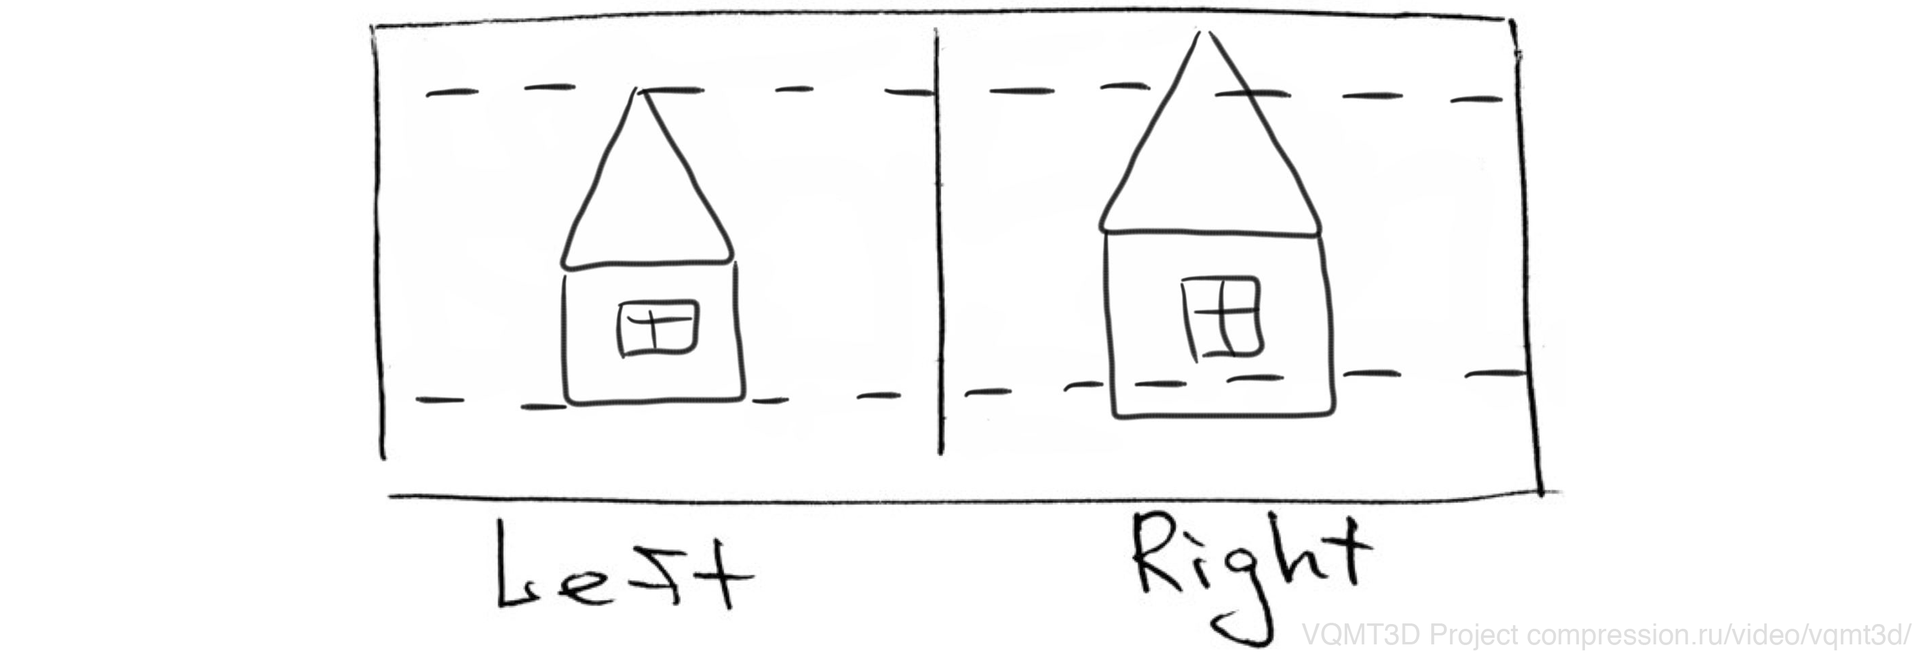

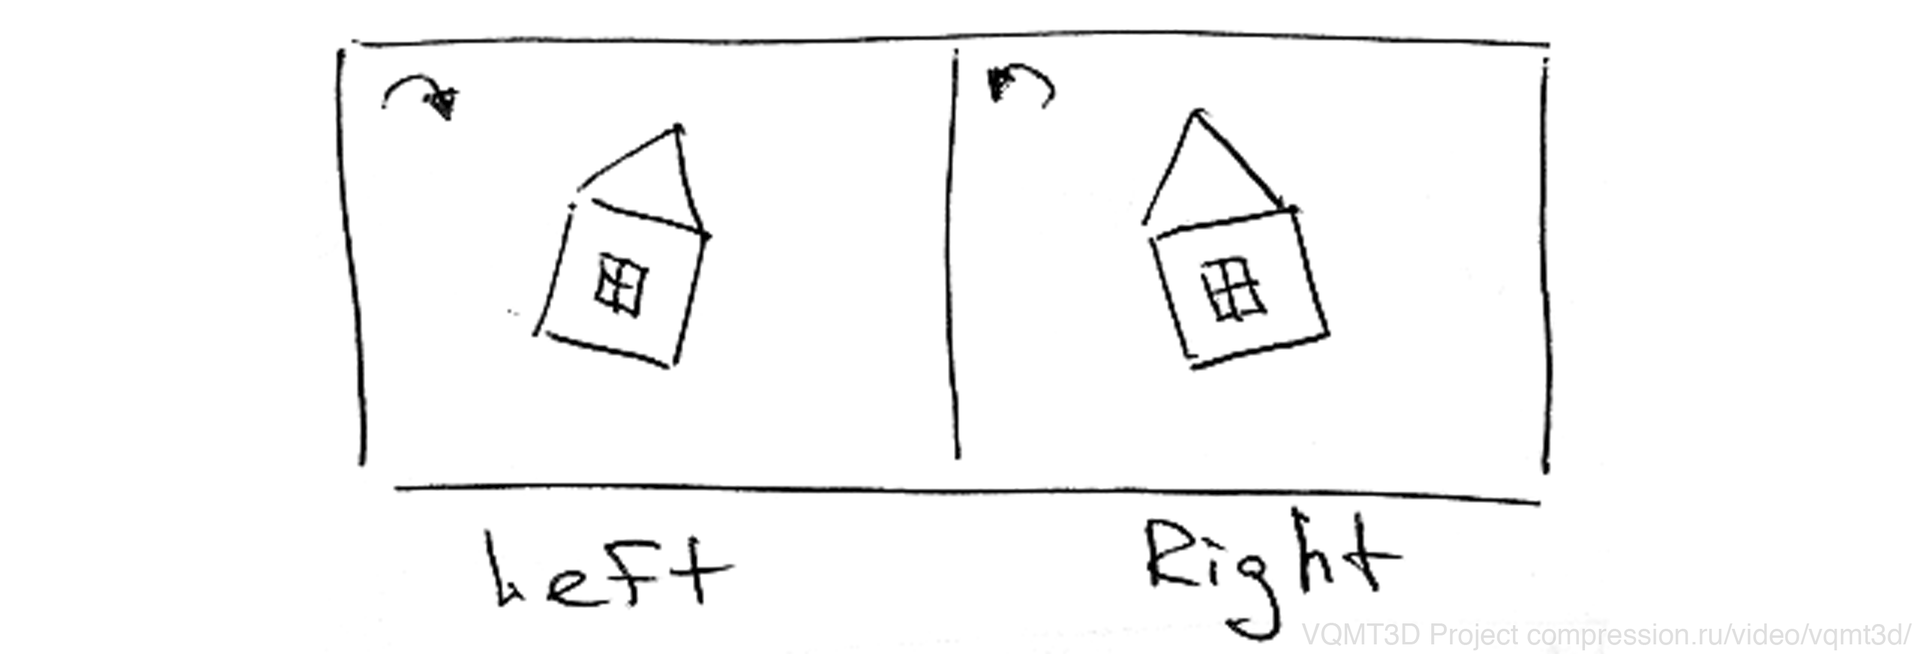

По сути, мы решаем задачу сопоставления двух кадров https://en.wikipedia.org/wiki/Image_rectification
Общее решение выглядит следующим образом: вводится модель преобразования между кадрами, параметры которого вычисляются любым доступным методом.  
В нашем случае создадим модель, которая допускает только аффинные преобразования между кадрами:
$$ Scale * y_l + Rotate * x_l + VerticalShift = y_r$$
$$ Scale * x_l + HorizontalShift = x_r$$
Как мы видим, она даже не учитывает возможный параллакс между ракурсами, но всё равно способна неплохо работать. Чтобы горизонтальный параллакс не вносил много шума в параметр масштаба Scale, будем заниматься решением только первого уравнения

In [ ]:
from sklearn.linear_model import #какой-нибудь класс, который обучается

class GeometryDistortionEstimator(Distortion3DEstimator):
    def __init__(self, clf):
        self._clf = clf
    
    def __call__(self, left_frame, right_frame, flow, confidence):
        h, w = flow.shape[0:2]
       
        return {
            'value_gd_shift': 0,
            'value_gd_scale': 0,
            'value_gd_rotate': 0
        }

In [ ]:
gde = GeometryDistortionEstimator()

gde_values = test_estimators([gde], data, 50)

In [ ]:
# Код для графиков и вычисления метрики качества

### Дополнительные квесты: ###
    * Напишите историю того, что вы сделали: какие идеи заработали, какие-нет (1 балл)
    * В чём измеряется каждый параметр (сдвиг, увеличение, масштаб) вашей метрики? (0.5 балла)
    * Какая метрика вертикального сдвига (из этой части или части 1) работает лучше? Как вы думаете, почему так произошло? (0.5 балла)
    * Проведите эксперименты с различными вариантами расчёта параметров модели (Линейная регрессия, RANSAC и прочее) или с разными методами вычисления оптического потока (2+ балла)
    * Попробуйте "исправить" артефакт, приведя правый кадр к левому по вычисленным параметрам модели: (2+ балла)
    * Визуализируйте, как обучается модель (типа такого): (1+ балл)
   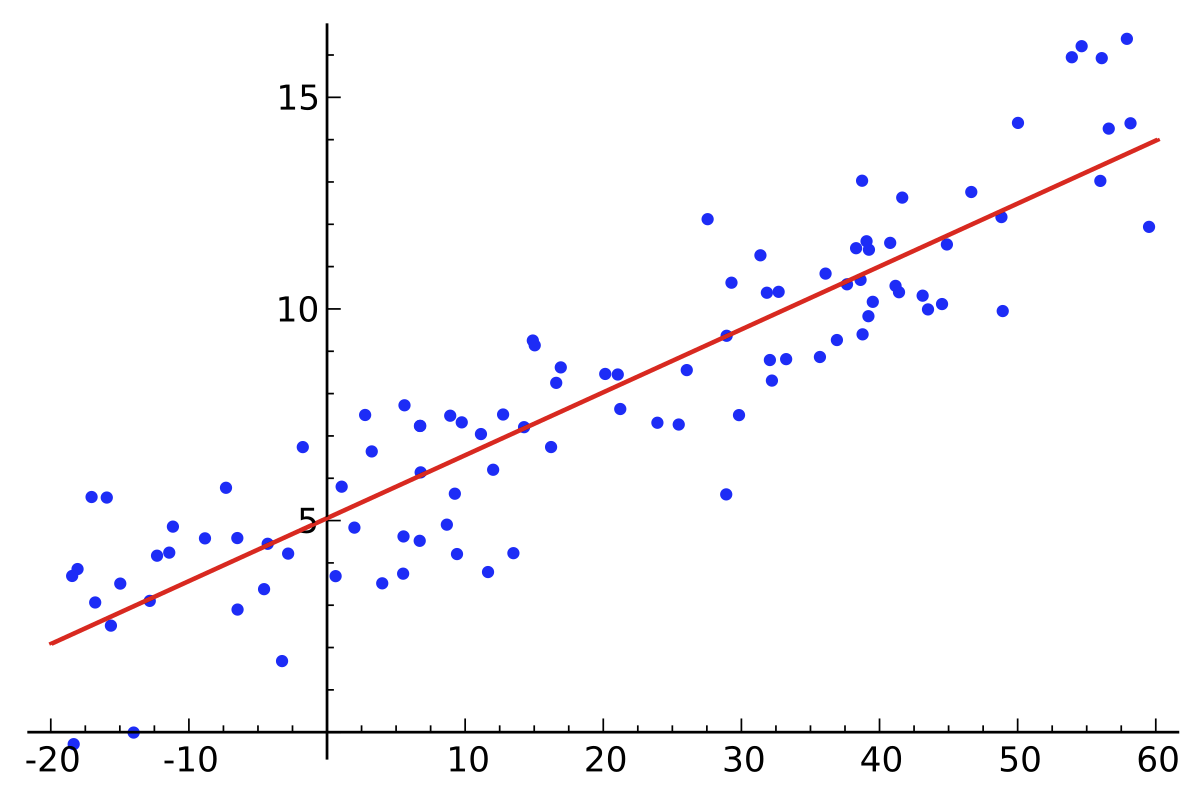

 ## Часть 3. Несоответствие по цвету (2 балла) ##

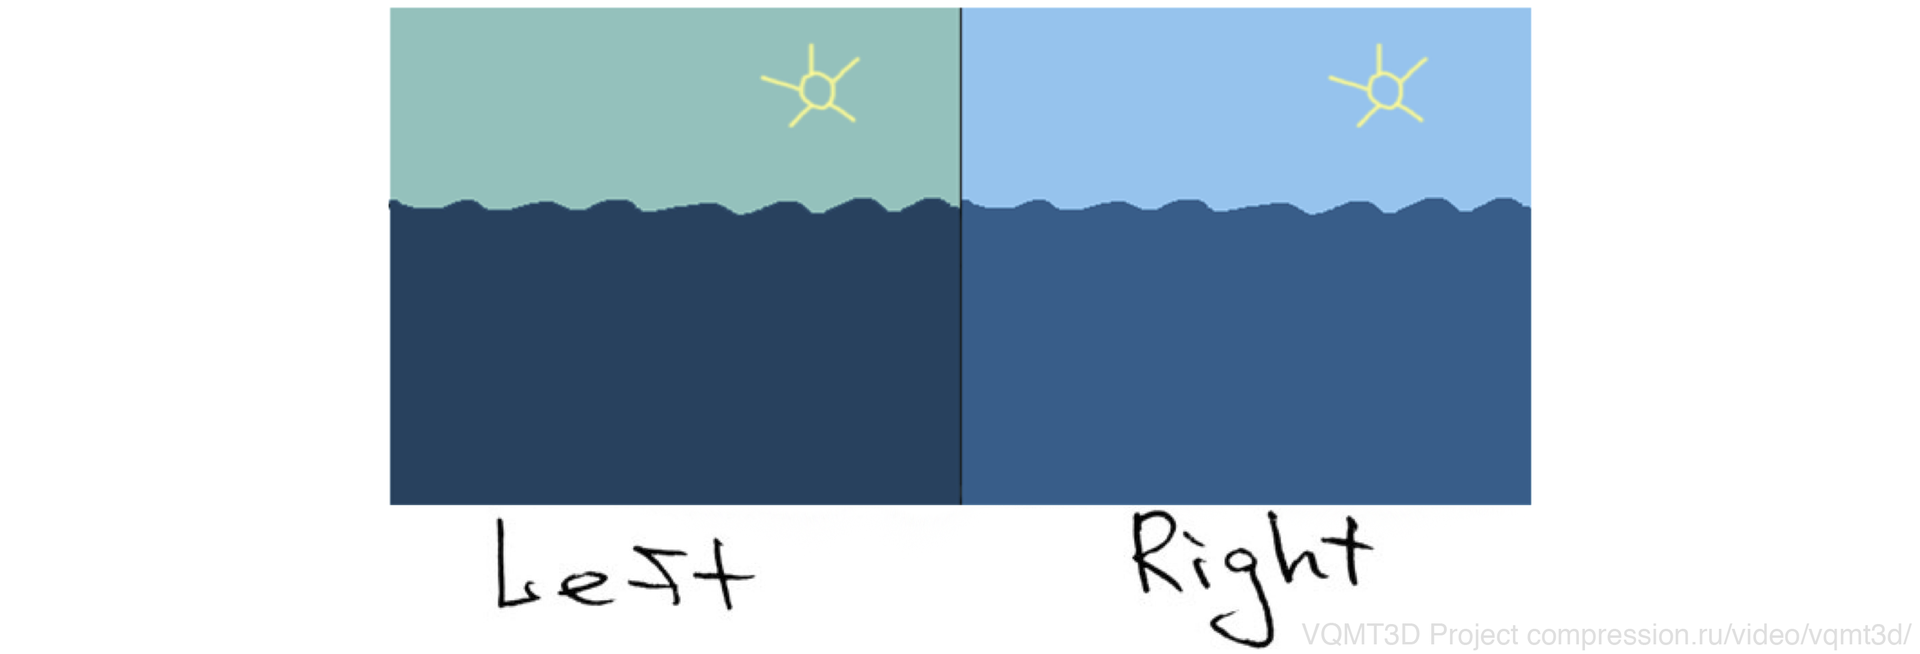

Наверно, эту метрику в первом приближении написать достаточно просто)



In [ ]:
class ColorDistortionEstimator(Distortion3DEstimator):
    def __init__(self):
        pass
    
    def __call__(self, left_frame, right_frame, flow, confidence):
        h, w = flow.shape[0], flow.shape[1]        
        return {'color': # код}

In [ ]:
cde = ColorDistortionEstimator()

cde_values = test_estimators([cde], data, 50)

In [ ]:
# График и оценка качества

### Дополнительные квесты: ###
    * Напишите историю того, что вы сделали: какие идеи заработали, какие-неткакие (1 балл)
    * Попробуйте построить "карту метрики" для каждого кадра - визуализировать, где конкретно видно искажение (это можно сделать гифкой например) (2 балла)

## Часть 4. Конец (2+  балла)?

Как вы могли заметить, в этом задании не было большой размеченной выборки. По сути, мы занимались придумыванием некоторого бейзлайна, который неплохо работает, и позволяет приближённо выделить хорошие примеры. Давайте подумаем, как можно собрать размеченную выборку

*Ваши идеи как оценить собрать выборку и на основе её оценить качество алгоритма*

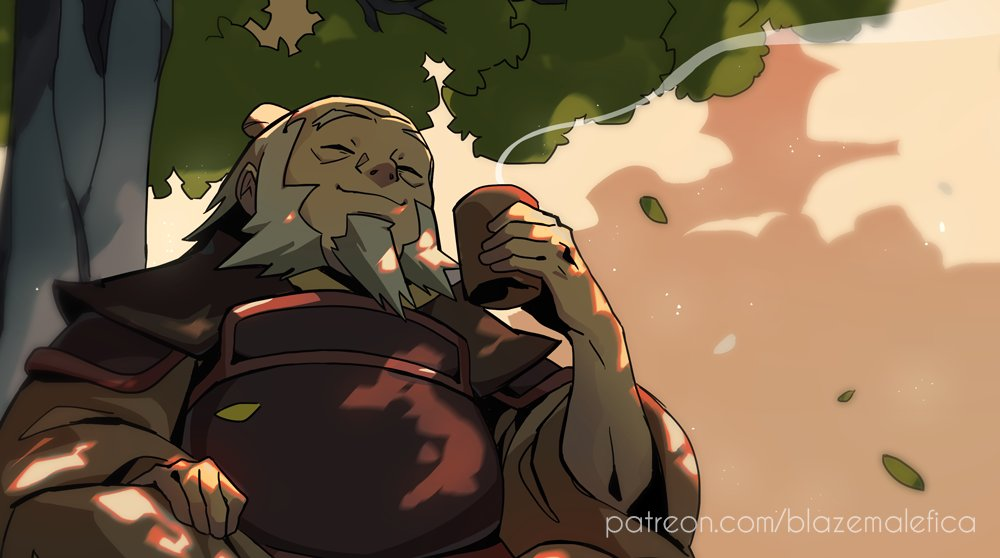

Это всё :3 

*Место для отзыва по заданию, рефлексии, пожеланий, предложений, личных угроз автору задания и прочего текста*